# Introduction to NumPy and Data Structures by
# [Dane Brown](https://www.ru.ac.za/computerscience/people/academicstaff/profdanebrown/)

Data science, machine learning, and scientific computing in `Python` depend on the `NumPy` package. Vector and matrix manipulation and crunching are substantially simplified due to `NumPy`'s power and ease of use. The infrastructure of some of Python's most popular packages relies on `NumPy` (for example, `Scikit-learn, SciPy, Pandas`, `Statsmodels` and `Tensorflow/Pytorch`). Besides being able to slice and dice numeric data, mastering `NumPy` can help you debug complex use cases in these libraries.

The following sections describe `NumPy`'s most prevalent uses and how it may represent data (tables, images, text, etc.) for machine learning models.

## **Creating Arrays**

A `NumPy` array, known as the ndarray, can be created using the `np.array()` convenience function by passing it a Python list. The generated array can be viewed:

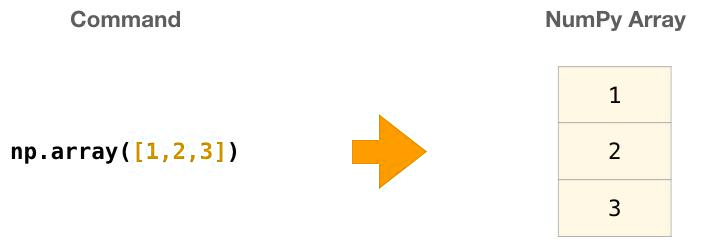

In [2]:
#@title Array creation from a List and displaying
# Importing NumPy to create an array
import numpy as np
l = [1, 2, 3]
x = np.array(l)
(x)

array([1, 2, 3])

In [ ]:
#@title Array creation from a Range sequence
a = np.arange(1, 3)
print(a)

[1 2]


In certain situations, initialization of the values of the array by NumPy may be desired. Functions such as `ones(), zeros()`, and `random.random()` are provided by `NumPy` to meet these needs, with the number of elements generated being passed to these functions.

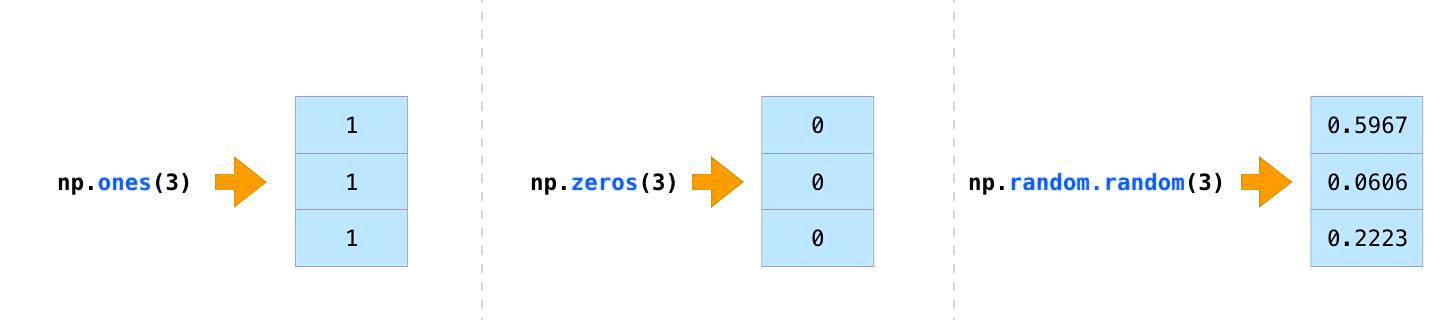

In [ ]:
#@title Array initialisation
p = np.ones((3))            # Create an array of all ones
# print(p)

q = np.zeros((3,))          # Create an array of all zeros
# print(q)

# How do I reproduce the same values per run?
r = np.random.random((3))   # Create an array filled with random values
# print(r)

s = np.full((10), 5)        # Create a constant array of defined shape
# print(s)

U = np.random.random((3, 3)) # Create a 3x3 matrix filled with random values
# print(U)

I = np.eye(4)               # Create a 4x4 identity matrix
# print(I)

In [ ]:
#@title Array type inspection
a = np.arange(1, 11)
print(type(a))
print(a.dtype)
display(a)

<class 'numpy.ndarray'>
int64


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Does `arange` produce only type `int` and not `float`? When should you use `linspace()` instead?

## **Array Arithmetic**

Let’s create two `NumPy` arrays to showcase their usefulness. We’ll call them data and ones:

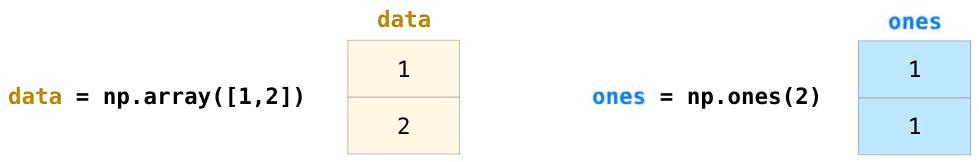

In [ ]:
#@title Create the two NumPy arrays as specified in the above figure
data = np.array([1,2])
ones = np.ones(2)

Adding them up position-wise (i.e. adding the values of each row) is as simple as typing data + ones:
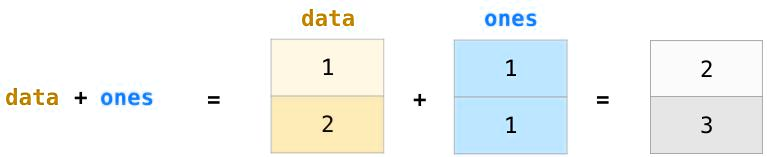



In [ ]:
#@title Adding values of each row
data + ones

array([2., 3.])


An **abstraction** like this enables **implicit loops**. It's a wonderful abstraction that allows you to think about problems at a higher level.

And it’s not only addition that we can do this way:
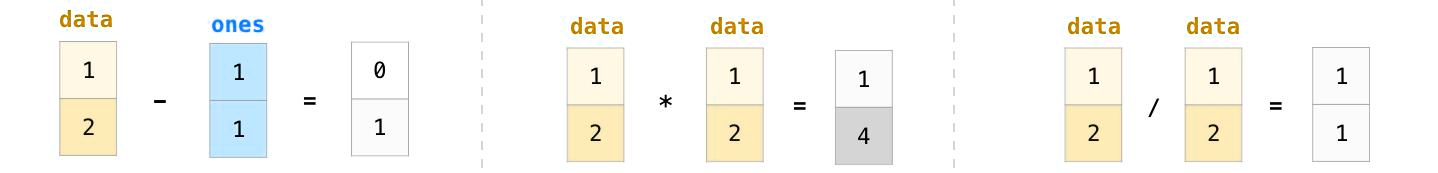

### Have you noticed how every operation happens row-wise?

In [ ]:
#@title Other basic row operations
data - ones
# data * data
# data / data

array([0., 1.])

There are often cases when we want carry out an operation between an array and a single number (we can also
call this an operation between a vector and a scalar). Say, for example, our array represents distance in miles and
**we want to convert it to kilometers**. We simply say data * 1.6:
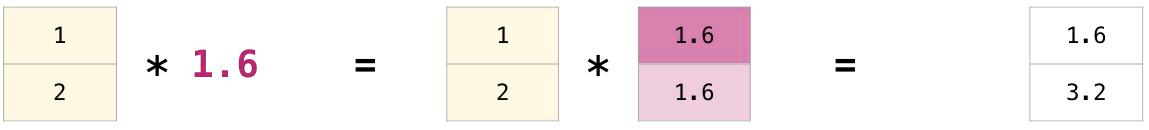

In [ ]:
#@title Broadcasting: array multiplied by a scaler example
data * 1.6

array([1.6, 3.2])

See how `NumPy` understood that operation to mean that the multiplication should happen with each cell? That
concept is called **_broadcasting_** , and it’s very useful.

## Indexing and slicing

We can index and slice `NumPy` arrays in all the ways we can slice `Python` lists:
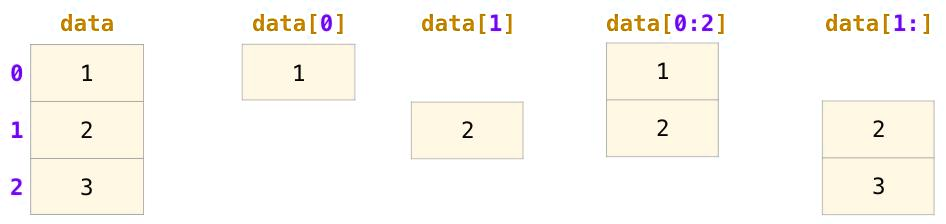

In [ ]:
#@title Indexing and slicing like Python lists
data = np.array([1, 2, 3])

# data[0]
# data[0:2]
# data[1:]
data[-2:]

array([2, 3])

## Basic Aggregation

Aggregation functions perform a calculation on a set of values and return a single value. In this case, `data.sum()` calculates the total sum of all the elements in the data collection.

Here are some `NumPy` aggregation functions applied on basic arrays (vectors):
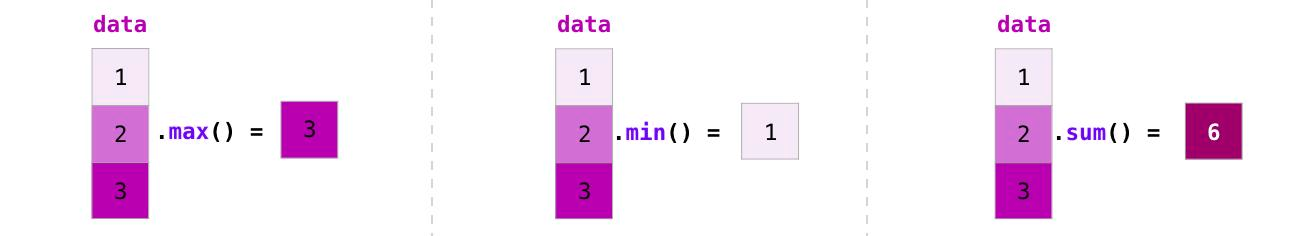

In addition to min, max, and sum, you get all the greats like mean to get the average, prod to get the result of
multiplying all the elements together, std to get standard deviation, and plenty of others.

In [ ]:
#@title Aggregation methods

data.max()
# data.min()
# data.sum()

3

## In more dimensions

Examples focussed on one dimension (vectors) thus far. A key part `NumPy` is its ability to apply operations to any number of dimensions.

### Creating Matrices

Lists of lists in the following shape to create a matrix:

```
np.array([[ 1 , 2 ],[ 3 , 4 ]])
```
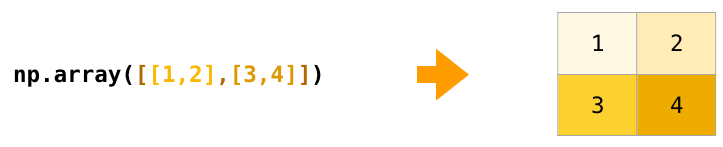

### vector vs array vs matrix vs tensor?

In [ ]:
#@title Creating a 2 x 2 Matrix

data = np.array([[1, 2], [3, 4]])
data

array([[1, 2],
       [3, 4]])

We can also use the same methods we mentioned above (ones(), zeros(), and random.random()) as long as we
give them a tuple describing the dimensions of the matrix we are creating:
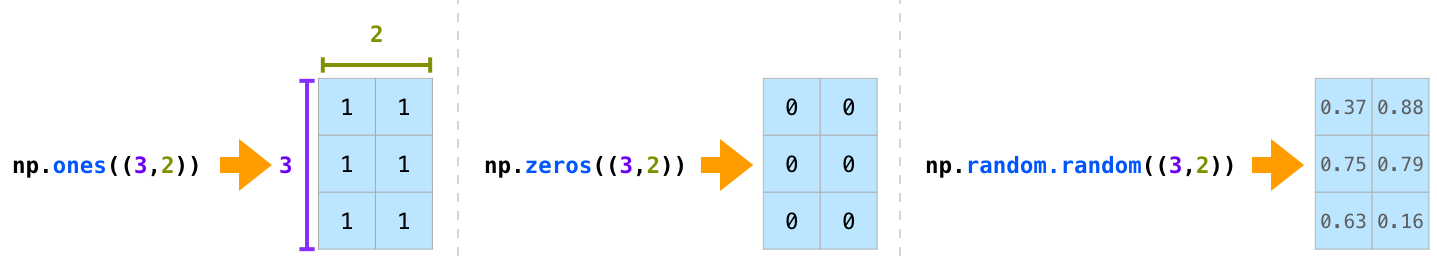

In [ ]:
#@title Create and initialise matrices from a tuple

np.ones((3, 2))
np.zeros((3, 2))
rng = np.random.default_rng()
rng.random((3, 2)) #apparently the new standard for producing random numbers in np

array([[0.8808945 , 0.33870193],
       [0.79113895, 0.90019574],
       [0.21536252, 0.61577297]])

### Matrix Arithmetic

Add and multiply matrices using arithmetic operators (+-*/) if the two matrices are the same size. `NumPy` handles those as position-wise operations (however there is a special case with Broadcasting):
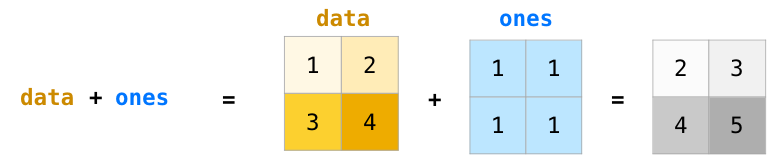

In [ ]:
#@title Matrix addition

data + ones

array([[2., 3.],
       [4., 5.]])

We can get away with doing these arithmetic operations on matrices of different size only if the different dimension
is one (e.g. the matrix has only one column or one row), in which case NumPy uses its **broadcast** rules for that
operation:
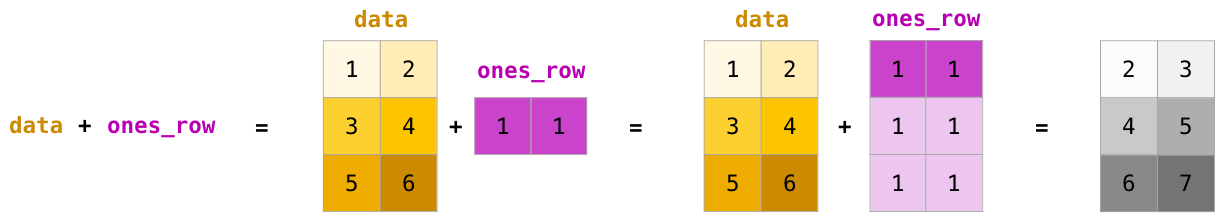

In [ ]:
#@title Broadcasting happens automatically on matrix operations where sizes differ

data = np.array([[1, 2], [3, 4], [5, 6]])
ones_row = [[1, 1]]
data + ones_row

array([[2, 3],
       [4, 5],
       [6, 7]])

### Dot Product

A key distinction to make with arithmetic is the case of matrix multiplication using the dot product. NumPy gives
every matrix a dot() method we can use to carry-out dot product operations with other matrices:
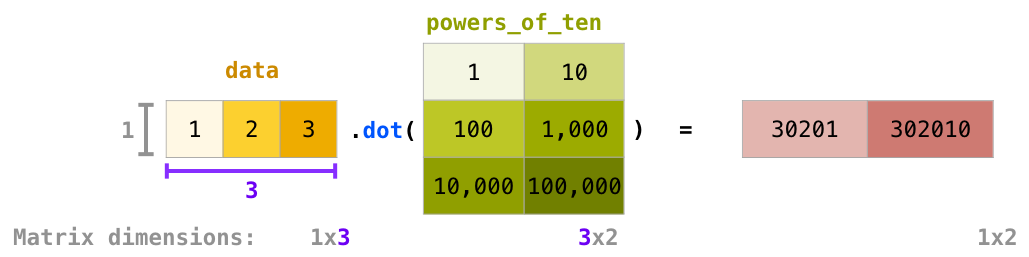

In [ ]:
#@title Basic dot product
data = np.array([1,2,3])
powers_of_ten = np.array([[1, 10], [100, 1000],[10000, 100000]]) # am I braindead?

display(powers_of_ten) # make me pretty?
data.dot(powers_of_ten)

array([[     1,     10],
       [   100,   1000],
       [ 10000, 100000]])

array([ 30201, 302010])

In [ ]:
#@title But what about the Computer Science way?

powers_of_ten = np.logspace(start=0, stop=5, num=6,  base=10, dtype="int")
powers_of_ten.reshape(3,2) # Why does this not work?
powers_of_ten

array([     1,     10,    100,   1000,  10000, 100000])

I’ve added matrix dimensions at the bottom of this figure to stress that the two matrices have to have the same
dimension on the side they face each other with. You can visualize this operation as looking like this:
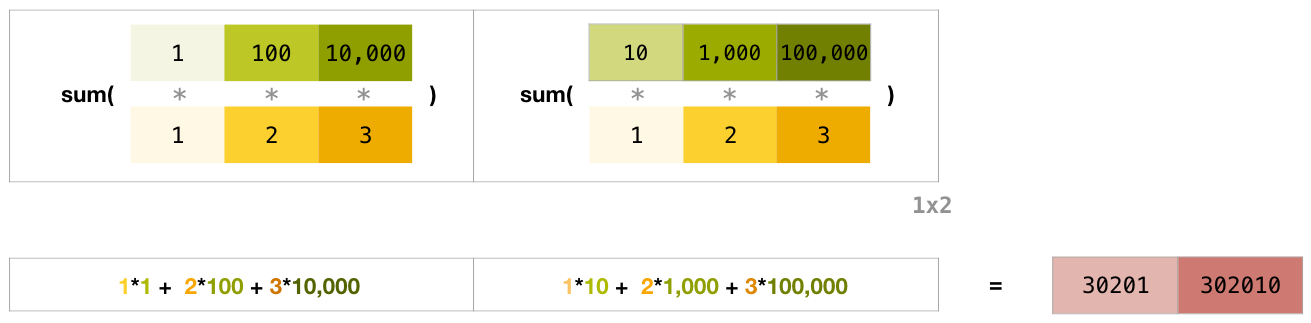

### Matrix Indexing

Indexing and slicing operations become even more useful when we’re manipulating matrices. Note the comma for column separation because it does row-wise ops:
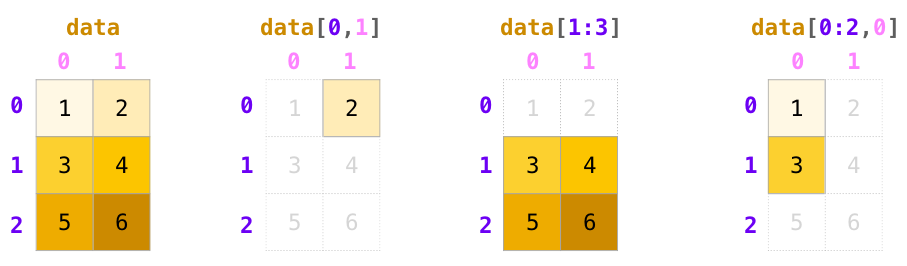

In [ ]:
#@title Revisiting indexing and slicing like Python (2D) lists
data = np.array([[1, 2], [3, 4], [5, 6]])

data[0, 1]
# data[1:3]
# data[0:2, 0]

2

### Matrix Aggregation: More Useful?

We can aggregate matrices the same way we aggregated vectors:
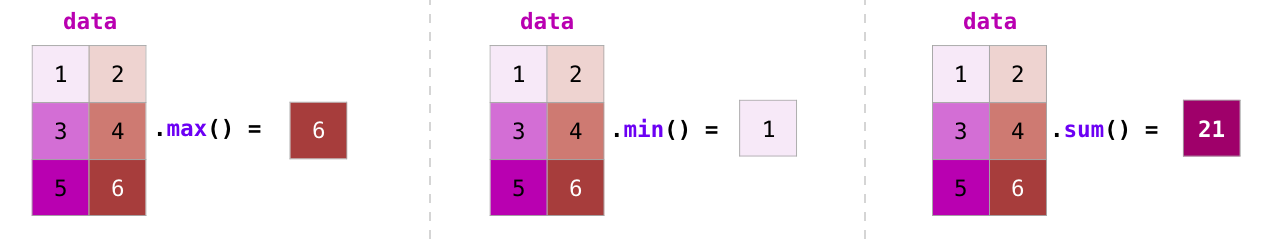



Not only can we aggregate all the values in a matrix, but we can also aggregate **across the rows** or **columns** by
using the axis parameter:

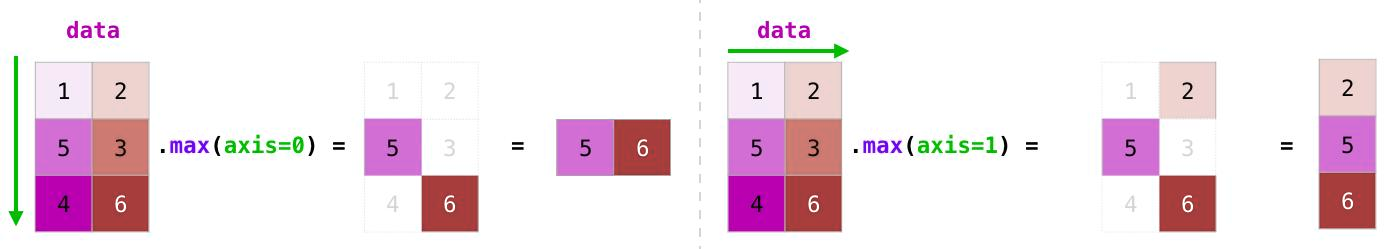

## Transposing and Reshaping

A common need when dealing with matrices is the need to rotate them. This is often the case when we need to
take the dot product of two matrices and need to align the dimension they share. `NumPy` arrays have a convenient
property known as attribute `T` to get the transpose of a matrix:
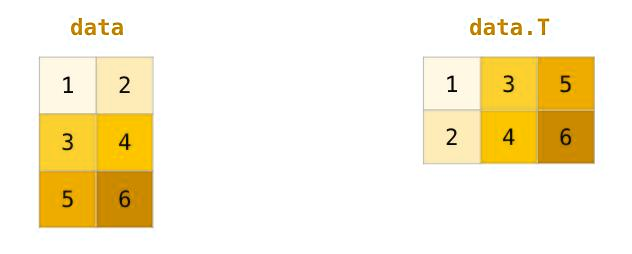

In [ ]:
#@title Tranpose is easy
data = np.array([[1, 2], [3, 4], [5, 6]])

data.T

array([[1, 3, 5],
       [2, 4, 6]])

In more advanced use case, you may find yourself needing to switch the dimensions of a certain matrix. This is
often the case in machine learning applications where a certain model expects a certain shape for the inputs that is
different from your dataset. NumPy’s reshape() method is useful in these cases. You just pass it the new
dimensions you want for the matrix. You can pass -1 for a dimension and NumPy can infer the correct dimension
based on your matrix:
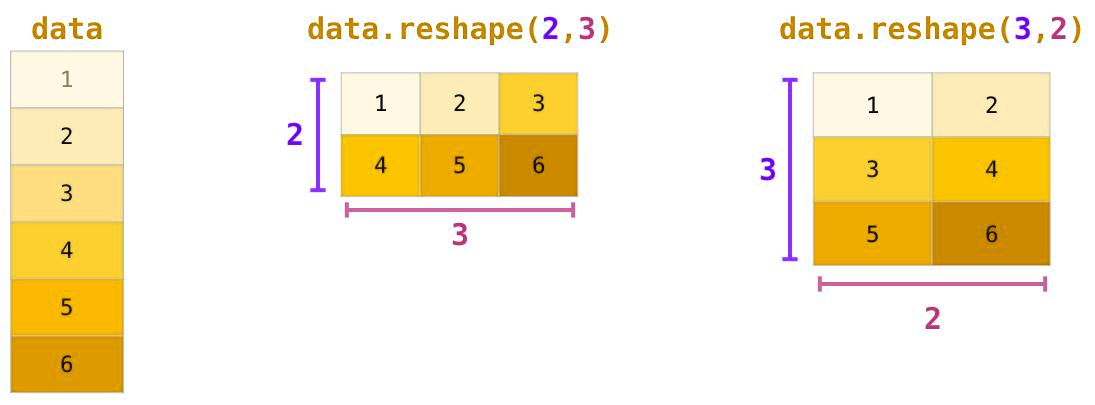

In [4]:
#@title Revisiting indexing and slicing like Python (2D) lists
data = np.array([[1, 2], [3, 4], [5, 6]])

data.reshape(-1)

array([1, 2, 3, 4, 5, 6])

## Yet More Dimensions

NumPy can do everything we’ve mentioned in any number of dimensions. Its central data structure is called ndarray for good reason.

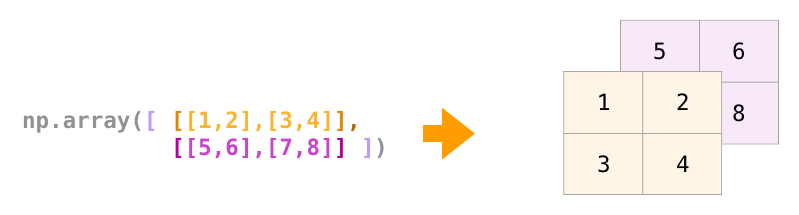

In a lot of ways, dealing with a new dimension is just adding a comma to the parameters of a NumPy function:
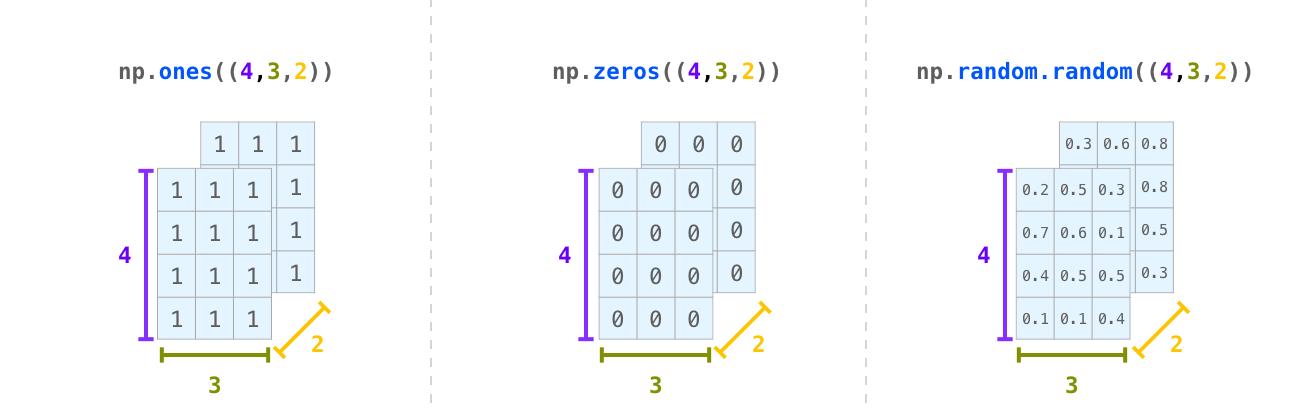

In [ ]:
#@title 3D lists for Tensor
data = np.ones((4,3,2))
data

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

## Practical Usage

And now for the payoff. Here are some examples of the useful things NumPy will help you through.

### Formulae

Implementing a mathematical formula/function on matrices and vectors is a key use case to consider NumPy for.
It’s why NumPy is the darling of the scientific python community. For example, consider the mean square error
formula that is central to supervised machine learning models tackling regression problems:

\begin{align}
\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.
\end{align}

Implementing this is a breeze in NumPy:

```np.square(np.subtract(y_pred, y_true)).mean()```

OR?

In [ ]:
#@title MSE: step-by-step
n = 3
y_pred = np.ones(3)
y_true = np.arange(1, 4, 1)

(1/n) * np.sum(np.square(np.subtract(y_pred, y_true)))

1.6666666666666665

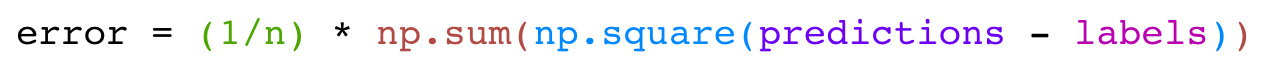

The beauty of this is that numpy does not care if predictions and labels contain one or a thousand values (as long
as they’re both the same size). We can walk through an example stepping sequentially through the four operations
in that line of code:
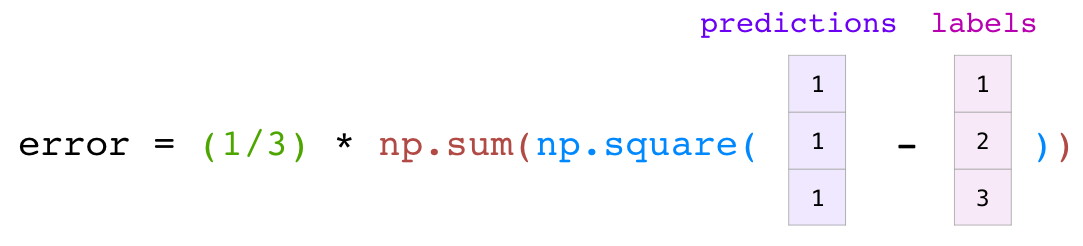

Both the predictions and labels vectors contain three values. Which means n has a value of three. After we carry
out the subtraction, we end up with the values looking like this:
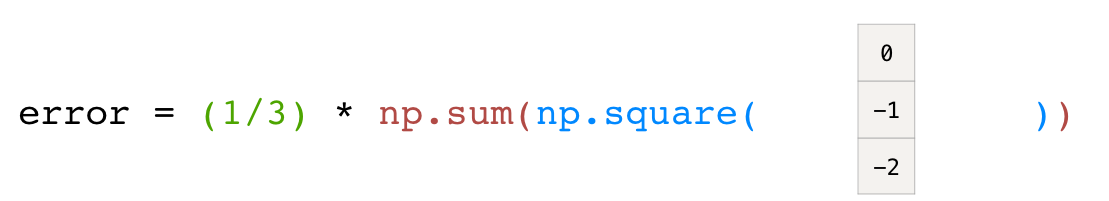

Then we can square the values in the vector:
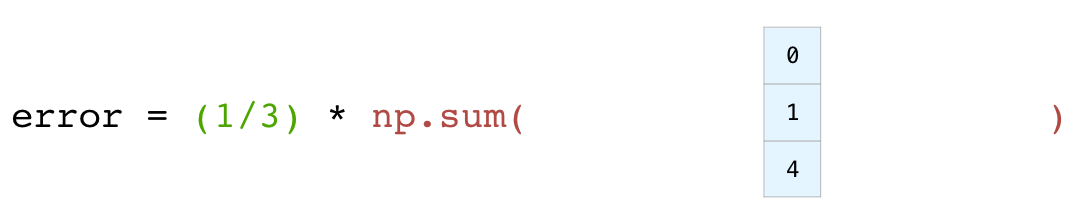


Now we sum these values:
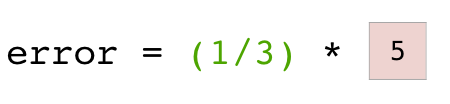

Which results in the error value for that prediction and a score for the quality of the model.

## How to save and load NumPy objects
And now for the payoff. Here are some examples of the useful things NumPy will help you through.

You will, at some point, want to save your arrays to disk and load them back without having to re-run the code. Fortunately, there are several ways to save and load objects with NumPy. The ndarray objects can be saved to and loaded from the disk files with loadtxt and savetxt functions that handle normal text files, load and save functions that handle NumPy binary files with a .npy file extension, and a savez function that handles NumPy files with a .npz file extension.

The .npy and .npz files store data, shape, dtype, and other information required to reconstruct the ndarray in a way that allows the array to be correctly retrieved, even when the file is on another machine with different architecture.

If you want to store a single ndarray object, store it as a .npy file using np.save. If you want to store more than one ndarray object in a single file, save it as a .npz file using np.savez. You can also save several arrays into a single file in compressed npz format with savez_compressed.

It’s easy to save and load and array with np.save(). Just make sure to specify the array you want to save and a file name. For example, if you create this array:

In [ ]:
#@title Saving as npy (np.save) or npz (np.savez) or tarring multiple (np.savez_compressed)
a = np.array([1, 2, 3, 4, 5, 6])

np.save("basic_array", a)

In [ ]:
#@title Loading the saved NumPy object
l = np.load("/content/basic_array.npy") #note default Colab path
print(l)

[1 2 3 4 5 6]


# **Pandas:** An introduction to text databases


### Data Representation

Think of all the data types you’ll need to crunch and build models around (spreadsheets, images, audio...etc). So
many of them are perfectly suited for representation in an n-dimensional array:

**Tables and Spreadsheets**

```
A spreadsheet or a table of values is a two dimensional matrix. Each sheet in a spreadsheet can be its own
variable. The most popular abstraction in python for those is the pandas dataframe, which actually uses
NumPy and builds on top of it.
```
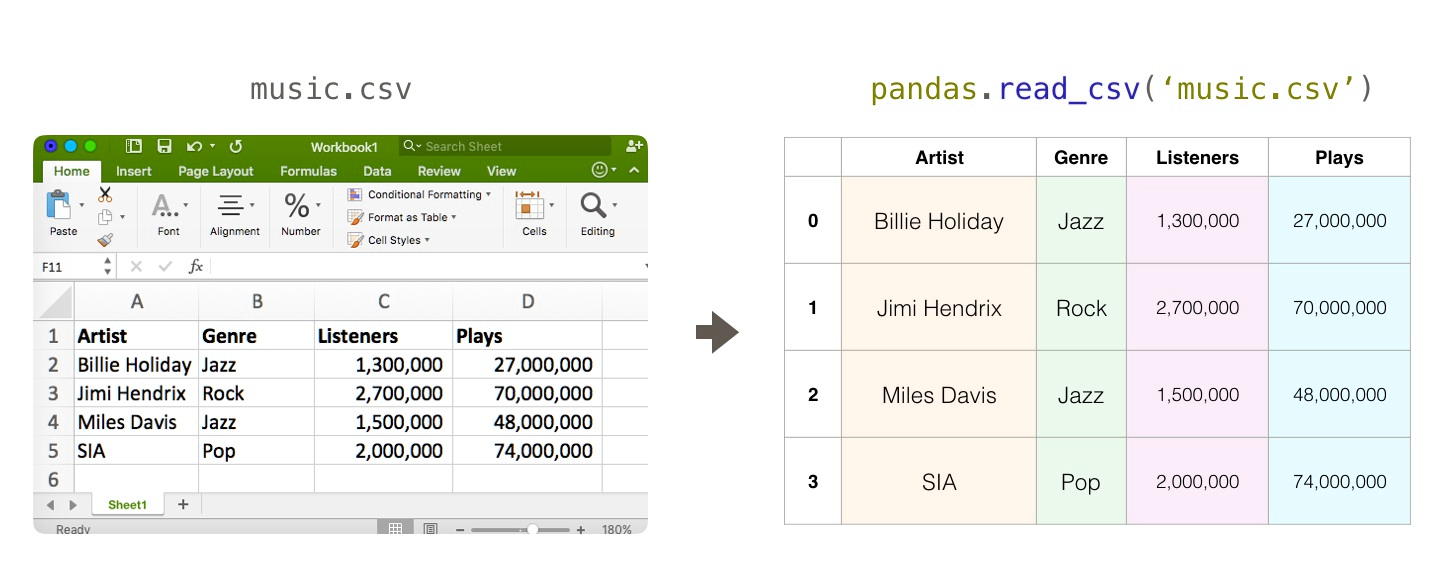

## Importing and exporting a CSV
It’s simple to read in a CSV that contains existing information. The best and easiest way to do this is to use [Pandas](https://pandas.pydata.org/):

In [ ]:
#@title Reading in a text Database
import pandas as pd
music_path = "/content/drive/MyDrive/ColabNotebooks/DataScience/Code/DataScienceforAnalytics/Chapter/music.csv"

# If all of your columns are the same type:
X = pd.read_csv(music_path).values
X

array([['Billie Holiday', 'Jazz', 1300000, 27000000],
       ['Jimmie Hendrix', 'Rock', 2700000, 70000000],
       ['Miles Davis', 'Jazz', 1500000, 48000000],
       ['SIA', 'Pop', 2000000, 74000000]], dtype=object)

In [ ]:
#@title Reading in only some columns

# Note they now of type object:
X = pd.read_csv(music_path, usecols=["Artist", "Plays"]).values
X


array([['Billie Holiday', 27000000],
       ['Jimmie Hendrix', 70000000],
       ['Miles Davis', 48000000],
       ['SIA', 74000000]], dtype=object)

In [ ]:
#@title Printing neatly by reading it in as a **DataFrame**

# If all of your columns are the same type:
df = pd.read_csv(music_path)
df

Artist Genre  Listeners     Plays
0  Billie Holiday  Jazz    1300000  27000000
1  Jimmie Hendrix  Rock    2700000  70000000
2     Miles Davis  Jazz    1500000  48000000
3             SIA   Pop    2000000  74000000

In [ ]:
#@title **Selection as Series**
df["Genre"]

# what about as Dataframe?
# df_genre = pd.Series(df["Genre"])
# df_genre


0    Jazz
1    Rock
2    Jazz
3     Pop
Name: Genre, dtype: object

# **Aggregation**

Aggregation can be used in a practical way that allows for combining, summarizing, and reorganizing data in order to gain insights and inform decisions. Examples (not limited to):


*   Calculating the mean or median of a set of data
*   Summing up the values of a set of data
*   Counting the number of occurrences of a certain value in a dataset
*   Grouping data by a certain variable and calculating summary statistics within each group
*   Calculating the maximum or minimum value in a dataset
*   Using binning to group data into categories or ranges and then summarizing the data within each category
*   Using rolling windows to calculate moving averages or other rolling statistics
*   Aggregating data across multiple datasets, such as merging or joining datasets and calculating summary statistics across the combined dataset.

In [ ]:
#@title **Grouping**: Shows the number of listeners and plays per (unique) genre:

df_genre_sum = df.groupby("Genre").sum()
df_genre_sum

Artist  Listeners     Plays
Genre                                                
Jazz   Billie HolidayMiles Davis    2800000  75000000
Pop                          SIA    2000000  74000000
Rock              Jimmie Hendrix    2700000  70000000

### Why `sum()`?

In [ ]:
#@title
# df_genre_sum = df.groupby("Genre").mean()
# df_genre_sum

Pandas grouped the the two “Jazz” rows into one, and since we used sum() for aggregation, it added together the listeners and plays for the two Jazz artists and shows the sums in the combined Jazz column.

This is not only nifty, but is an extremely powerful data analysis method. Now that you know groupby(), you wield immense power to fold datasets and uncover insights from them. Aggregation is the first pillar of statistical wisdom, and so is one of the foundational tools of statistics.

In addition to sum(), pandas provides multiple aggregation functions including mean() to compute the average value, min(), max(), and multiple other functions. More on groupyby() in the groupby() User Guide.

If you use groupby() to its full potential, and use nothing else in pandas, then you’d be putting pandas to great use. But the library can still offer you much, much more.

The creation of new columns from existing ones is a common technique used in data manipulation to derive new information or transform data into a more useful format for analysis.


In [ ]:
#@title Create new columns from existing

df["Avg Plays"] = df["Plays"]/df["Listeners"]
df

Artist Genre  Listeners     Plays  Avg Plays
0  Billie Holiday  Jazz    1300000  27000000  20.769231
1  Jimmie Hendrix  Rock    2700000  70000000  25.925926
2     Miles Davis  Jazz    1500000  48000000  32.000000
3             SIA   Pop    2000000  74000000  37.000000

Obivously we have to make some assumptions. e.g. Is this an annual table ?

In [5]:
#@title **Filtering** and **deleting** (all samples of a specific genre)

# Filtering:
bad_genre = ["Jazz"]
df_nojazz = df[~df["Genre"].isin(bad_genre)]
df_nojazz

NameError: name 'df' is not defined

In [ ]:
#@title Saving to **CSV**
new_music_path = music_path[:-4] + "noJazz.csv"

# np.savetxt("np.csv", a, fmt="%.2f", delimiter=",") #yuck
df_nojazz.to_csv(new_music_path)

# **Plotting**

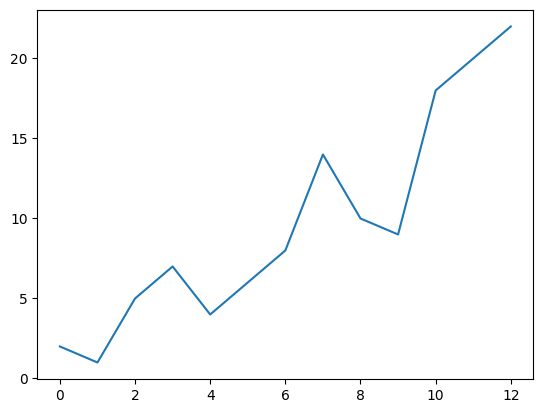

In [6]:
#@title Introduction to **Plotting**
import matplotlib.pyplot as plt
a = np.array([2, 1, 5, 7, 4, 6, 8, 14, 10, 9, 18, 20, 22])

plt.plot(a) #Plot 1D data
plt.show()

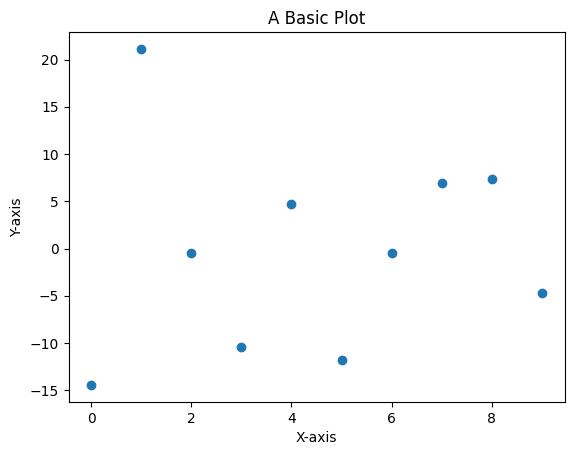

In [7]:
#@title Independent v. dependent variables
X = np.arange(10)
y = X + 10 * np.random.randn(10)

plt.scatter(X, y) #bread and butter in DS and explainable ML

# Adding title, xlabel and ylabel
plt.title('A Basic Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Modified from https://www.theclickreader.com/plotting-2d-plots-in-matplotlib/

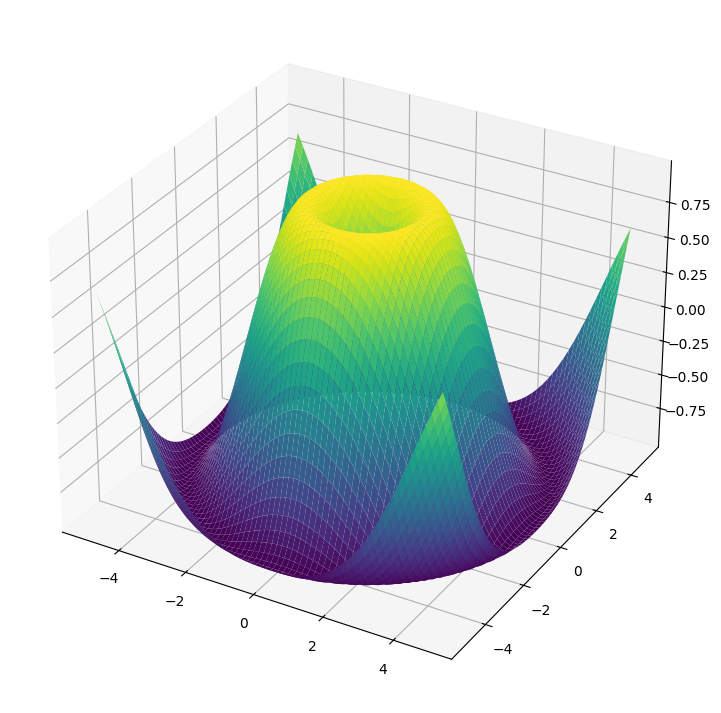

In [8]:
#@title **3D? 🤮**
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(projection='3d')
X = np.arange(-5, 5, 0.15)
Y = np.arange(-5, 5, 0.15)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

# **Specialized Topics**

**Audio and Timeseries**

```
An audio file is a one-dimensional array of samples. Each sample is a number representing a tiny chunk of the
audio signal. CD-quality audio may have 44,100 samples per second and each sample is an integer between -
65535 and 65536. Meaning if you have a ten-seconds WAVE file of CD-quality, you can load it in a NumPy
array with length 10 * 44,100 = 441,000 samples. Want to extract the first second of audio? simply load the file
into a NumPy array that we’ll call audio, and get audio[:44100].
```
Here’s a look at a slice of an audio file [Taken from https://jalammar.github.io/visual-numpy/ ]:
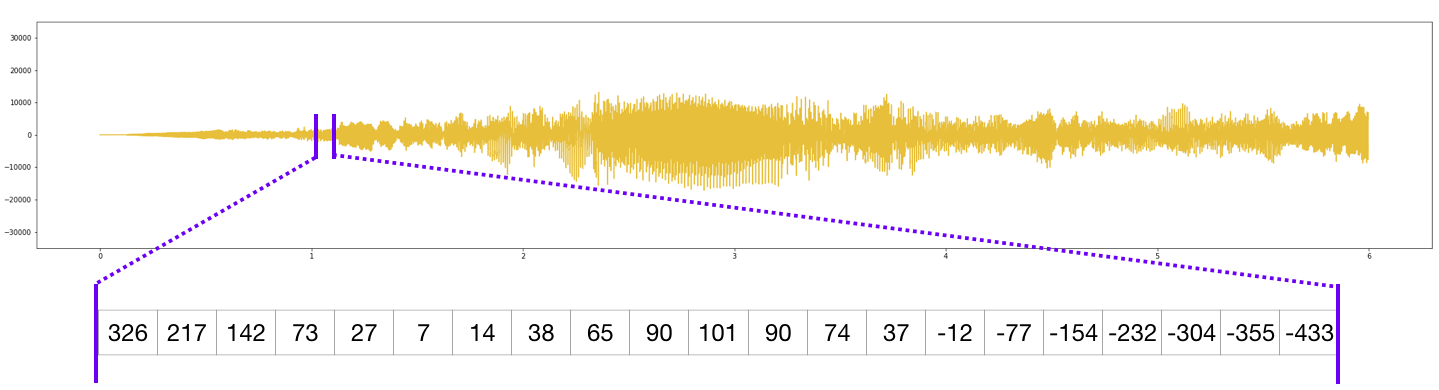

The same goes for time-series data (for example, the price of a stock over time).

**Images**

```
An image is a matrix of pixels of size (height x width).
```
```
If the image is black and white (a.k.a. grayscale), each pixel can be represented by a single number
(commonly between 0 (black) and 255 (white)). Want to crop the top left 10 x 10 pixel part of the image?
Just tell NumPy to get you image[:10,:10].
```
Here’s a look at a slice of an image file [Taken from https://jalammar.github.io/visual-numpy/ ]:
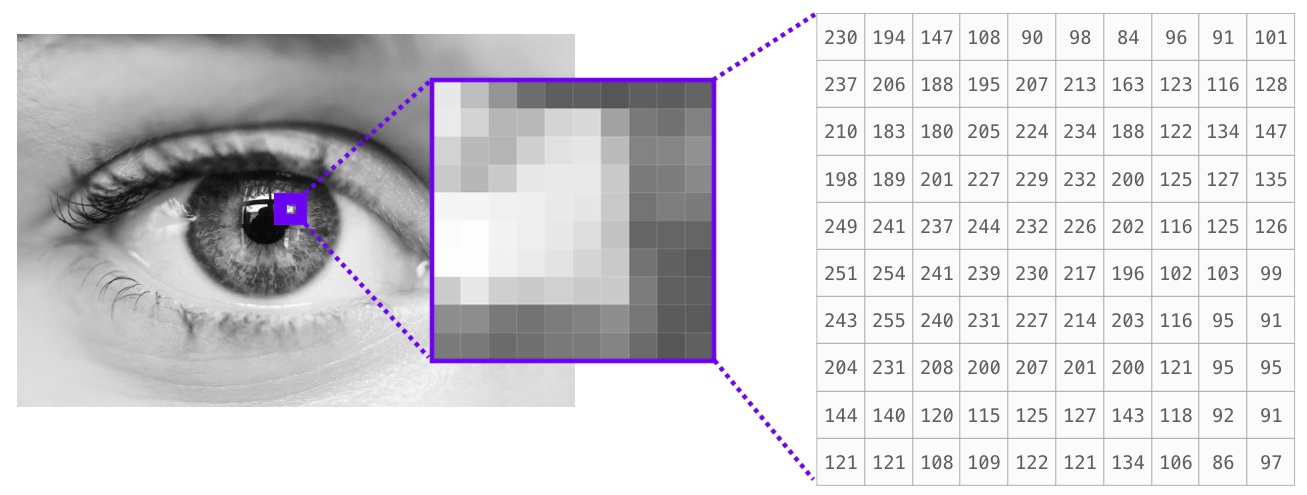




``` If the image is colored, then each pixel is represented by three numbers - a value for each of red, green, and blue. In that case we need a 3rd dimension (because each cell can only contain one number). So a colored image is represented by an ndarray of dimensions: (height x width x 3). ```
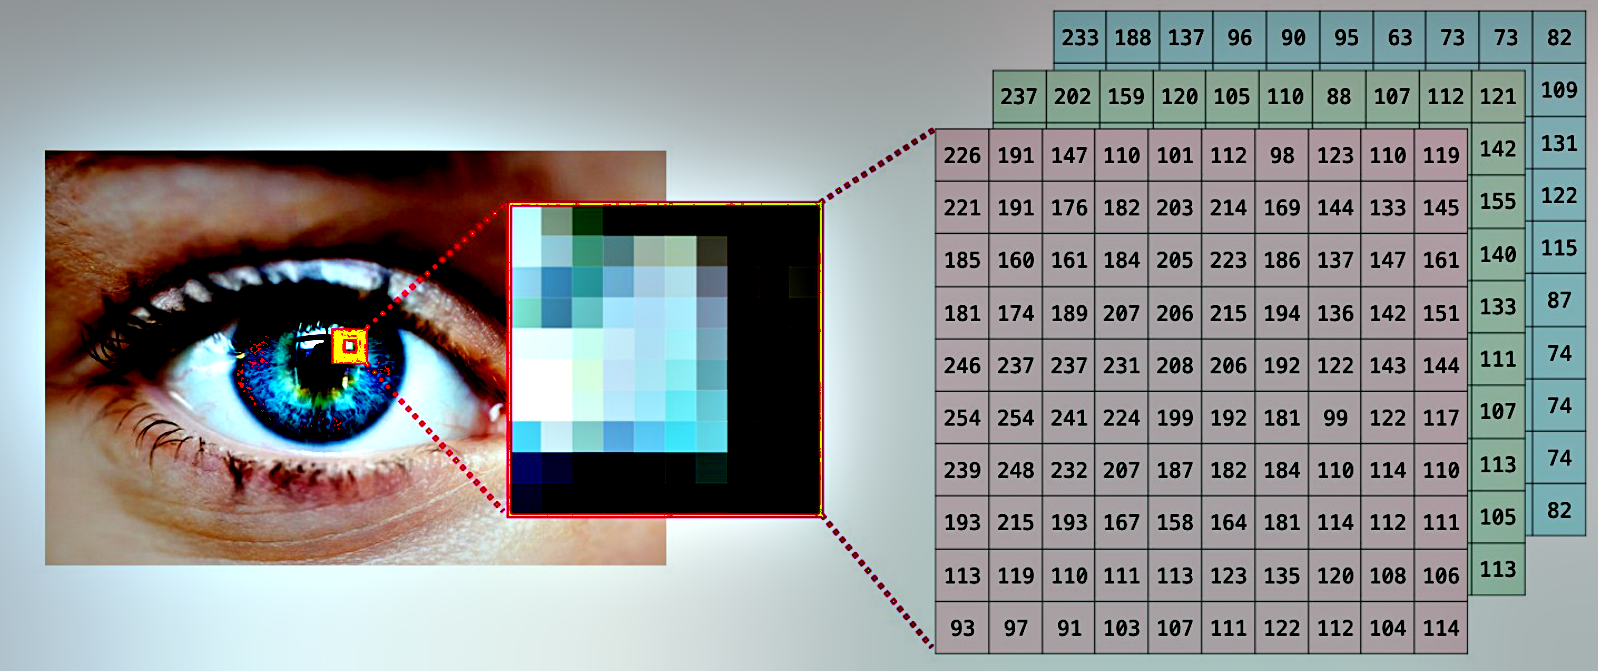




**Language**

If we’re dealing with text, the story is a little different. The numeric representation of text requires a step of building
a vocabulary (an inventory of all the unique words the model knows) and an embedding step. Let us see the steps
of numerically representing this (translated) quote by an ancient spirit:

“Have the bards who preceded me left any theme unsung?”

A model needs to look at a large amount of text before it can numerically represent the anxious words of this
warrior poet. We can proceed to have it process a small dataset and use it to build a vocabulary (of 71,290 words):
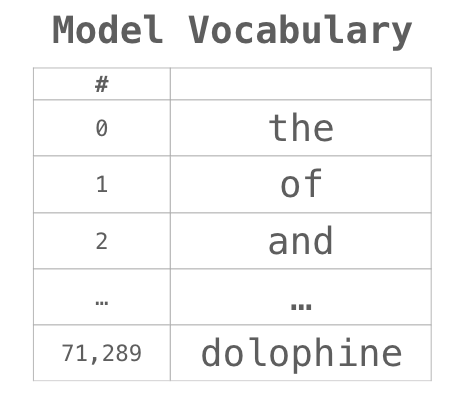


The sentence can then be broken into an array of tokens (words or parts of words based on common rules):
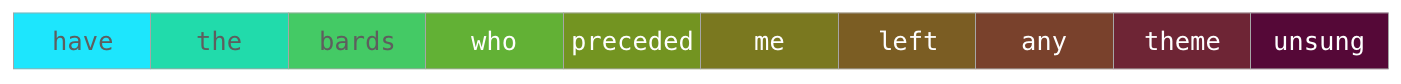

We then replace each word by its id in the vocabulary table:
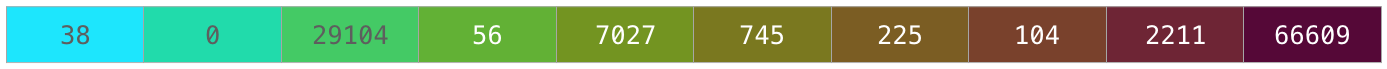

These ids still don’t provide much information value to a model. So before feeding a sequence of words to a
model, the tokens/words need to be replaced with their embeddings (50 dimension word2vec embedding in this
case):
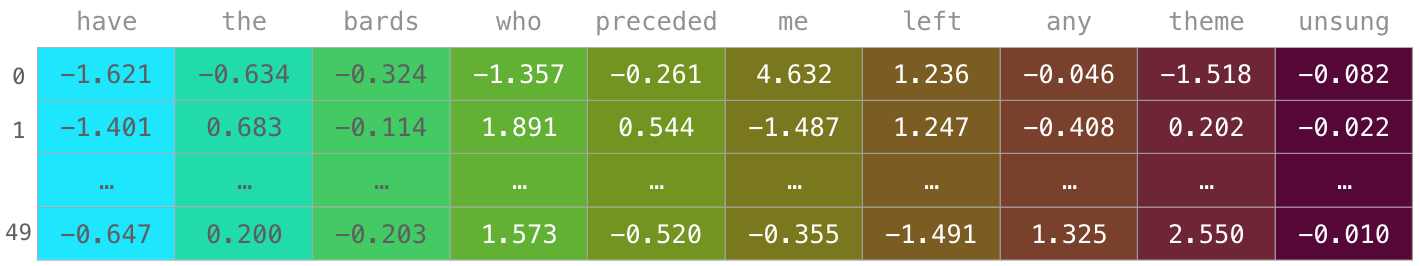

You can see that this NumPy array has the dimensions [embedding_dimension x sequence_length]. In practice
these would be the other way around, but I’m presenting it this way for visual consistency. For performance
reasons, deep learning models tend to preserve the first dimension for batch size (because the model can be
trained faster if multiple examples are trained in parallel). This is a clear case where reshape() becomes super
useful. A model like BERT, for example, would expect its inputs in the shape: [batch_size, sequence_length,
embedding_size].
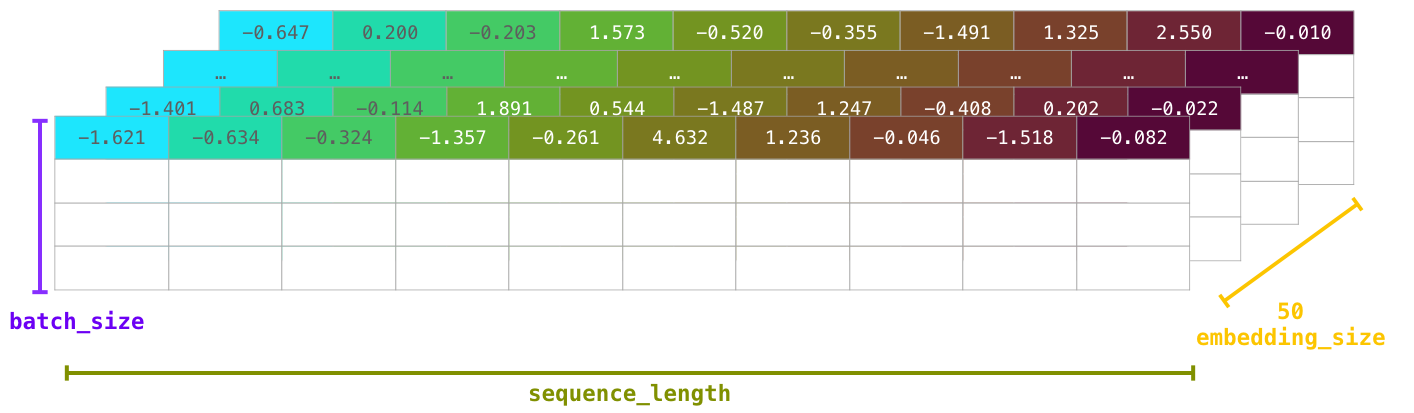


This is now a numeric volume that a model can crunch and do useful things with. I left the other rows empty, but
they’d be filled with other examples for the model to train on (or predict).

# **Further reading**

[Python tutorial](https://docs.python.org/dev/tutorial/index.html)

[NumPy Reference](https://numpy.org/devdocs/reference/index.html#reference)

[SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html)

[SciPy Lecture Notes](https://scipy-lectures.org/)

[A matlab, R, IDL, NumPy/SciPy dictionary](http://mathesaurus.sf.net/)